In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
%matplotlib inline
from random import randint, choice, choices
movies_df = pd.read_csv("movies.csv")
movies_df["year"] = movies_df.title.str.extract(pat='(\d{4})', expand=False)
movies_df['title'] = movies_df['title'].str.replace(r'\W{1}\d{4}\W{1}', '  ', regex=True)
movies_df["title"] = movies_df["title"].apply(lambda x: x.rstrip(" "))

In [2]:
movies_genres_df = movies_df.copy()
movies_genres_list = []
for index, column in movies_df.iterrows():
    for i in column["genres"].split("|"):
        movies_genres_list.append(i)
uniq_genres_list = np.unique(movies_genres_list)
uniq_genres_list = np.delete(uniq_genres_list, [0])
uniq_genres_list

array(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype='<U18')

In [14]:
movies_genres_df = movies_genres_df.assign(**{col: np.nan for col in movies_genres_list})
movies_genres_df.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jumanji,Adventure|Children|Fantasy,1995,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Grumpier Old Men,Comedy|Romance,1995,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Father of the Bride Part II,Comedy,1995,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for index, column in movies_genres_df.iterrows():
    for genre in column["genres"].split("|"):
        if genre in movies_genres_list:
            movies_genres_df.loc[index, genre] = 1
movies_genres_df.fillna(0, inplace=True)
movies_genres_df.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,Adventure|Children|Fantasy,1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,Comedy|Romance,1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,Comedy,1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
user_input_df = pd.DataFrame([
    {"title": "Toy Story", "rating": 4},
    {"title": "Jumanji", "rating": 5},
    {"title": "Father of the Bride Part II", "rating": 5},
    {"title": "Heat", "rating": 5},
    {"title": "Space Jam", "rating": 5}
])

In [6]:
merged_df = pd.merge(user_input_df, movies_df, on="title")
for index, column in merged_df.iterrows():
    if column["title"] == "Heat" and column["year"] != "1995":
        merged_df.drop(index, inplace=True)
merged_df.drop(["genres", "year"], axis=1 ,inplace=True)
merged_df = merged_df.reset_index(drop=True)
user_movies = pd.merge(merged_df, movies_genres_df, on='movieId')
users_fav_genres = user_movies.drop(["title_y", "year", "title_x", "rating", "movieId", "genres"], axis=1)
users_fav_genres

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
user_profile = users_fav_genres.transpose().dot(user_input_df["rating"])
user_profile

Adventure             14.0
Animation              9.0
Children              14.0
Comedy                14.0
Fantasy               14.0
Romance                0.0
Drama                  0.0
Action                 5.0
Crime                  5.0
Thriller               5.0
Horror                 0.0
Mystery                0.0
Sci-Fi                 5.0
IMAX                   0.0
Documentary            0.0
War                    0.0
Musical                0.0
Western                0.0
Film-Noir              0.0
(no genres listed)     0.0
dtype: float64

In [8]:
movie_matrix = movies_genres_df.drop(["title", "genres", "year"], axis=1)
movie_matrix.set_index("movieId", inplace=True)
recommend_movies = pd.DataFrame((movie_matrix * user_profile).sum(axis=1) / user_profile.sum())
recommend_movies

,0
movieId,
1,0.764706
2,0.494118
3,0.164706
4,0.164706
5,0.164706
...,...
151697,0.058824
151701,0.000000
151703,0.000000


In [17]:
recommend_movies.columns = ['Weights']
results_df = pd.merge(movies_df, recommend_movies, on="movieId")
results_df.sort_values(by='Weights', ascending=False)
results_df[results_df["movieId"] == 5018]

,movieId,title,genres,year,Weights
4923,5018,Motorama,Adventure|Comedy|Crime|Drama|Fantasy|Mystery|S...,1991,0.670588


Text(0.5, 0, '')

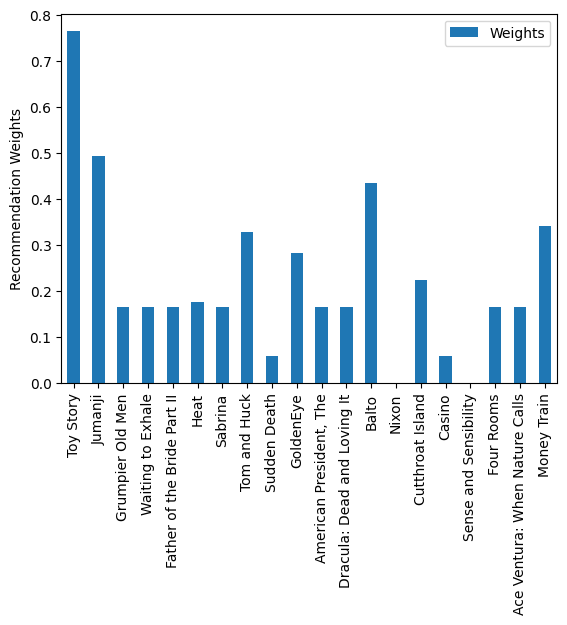

In [10]:
plot_df = results_df.head(20)
plot_df.plot(x="title", y="Weights", kind="bar")
plt.ylabel("Recommendation Weights")
plt.xlabel('')